In [1]:
import constants
cache_folder_name = 'ratio=logreg;loss=squared;method=pymanopt_UB_fast_no_ws;u_dim=9'
seed = 44

In [2]:
import autograd.numpy as np
np.random.seed(seed)
import python_utils.python_utils.basic as basic
import python_utils.python_utils.caching as caching
log_folder = '%s/%s' % (constants.cache_folder, cache_folder_name)
caching.init(constants.cache_folder, constants.which_hash, basic.archiver(log_folder))
%load_ext autoreload
%autoreload 2
import matplotlib
matplotlib.use('Agg')

In [3]:
import matplotlib.pyplot as plt
from IPython.display import display_pretty, display_html
import python_utils.python_utils.basic as basic
import pandas as pd
import pdb
import itertools
import functools
import scipy.stats
import scipy
import cvxopt
import autograd
import autograd.numpy as np
import domain_adapt.domain_adapt.new.fxns as fxns
import domain_adapt.domain_adapt.new.utils as utils
import domain_adapt.domain_adapt.new.optimizers as optimizers
import domain_adapt.domain_adapt.new.constructors as constructors
#import domain_adapt.domain_adapt.SDR_data as data
import domain_adapt_run.domain_adapt_run.notebooks.new.hyperparameter_loss_surface_stratified.run as run
import data.domain_adapt_data.domain_adapt_data.fxns as data

In [4]:
# define data
training_proportion = 0.9
training_sampler = functools.partial(data.kmm_paper_pca_subsample, 10., 5., 0.1)
get_data_f = data.CA_housing
num_data = 900

In [5]:
#
get_data = functools.partial(data.get_data_helper, training_proportion, training_sampler, get_data_f, num_data)

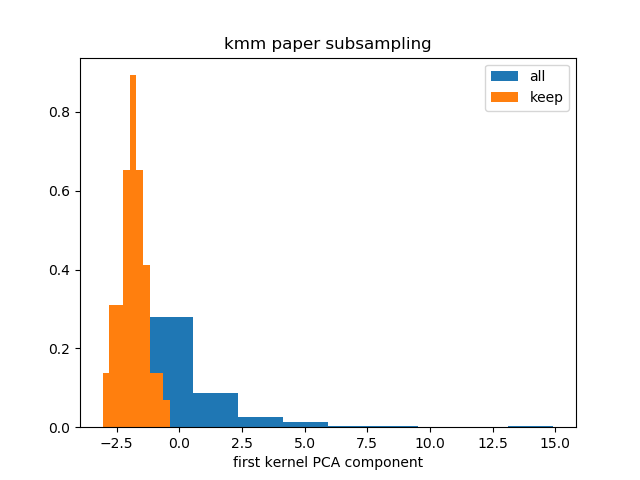

xs_train shape: (108, 9) xs_test_shape (108,)


In [6]:
# test get_data
xs_train, ys_train, xs_test, ys_test = get_data(1)
print 'xs_train shape:', xs_train.shape, 'xs_test_shape', xs_test.shape

In [7]:
# define fitter
import pymanopt.solvers
pymanopt_options={'logverbosity':2, 'maxiter':1000}#, 'linesearch':pymanopt.solvers.linesearch.LineSearchBackTracking(maxiter=2, initial_stepsize=1)}
cvx_opt_warm_start = True
cvx_opt_scipy_minimize_options = {'maxiter':1000, 'disp':False}
#cvx_opt_scipy_minimize_method = 'cg'
#cvx_opt_scipy_minimize_method = 'BFGS' 
cvx_opt_scipy_minimize_method = 'L-BFGS-B'
#cvx_opt_scipy_minimize_verbose = 1000
cvx_opt_scipy_minimize_verbose = False
unconstrained = False
unconstrained_scipy_minimize_options = {'maxiter':100}
unconstrained_scipy_minimize_method = 'cg'
unconstrained_scipy_minimize_verbose = 1
plot_b_info = constructors.plot_b_info
#unconstrained = True
num_tries = 5
def get_fitter(c_lsqr, c_logreg, weight_reg, sigma, max_ratio, u_dim, c_lsqr_loss=0., c_lsqr_loss_eval=0., UB_reg=0.):
    if unconstrained:
        B_init_f_getter = lambda xs_train, ys_train, xs_test: (lambda: np.random.normal(size=xs_train.shape[1]))
    else:
        B_init_f_getter = lambda xs_train, ys_train, xs_test: (lambda: np.random.normal(size=(xs_train.shape[1],u_dim)))
    return constructors.no_ws_logreg_ratio_UB_fitter(c_lsqr=c_lsqr, c_logreg=c_logreg, weight_reg=weight_reg, sigma=sigma, B_init_f_getter=B_init_f_getter, unconstrained=unconstrained, c_lsqr_loss=c_lsqr_loss, c_lsqr_loss_eval=c_lsqr_loss_eval, UB_reg=UB_reg, max_ratio=max_ratio, num_tries=num_tries, pymanopt_options=pymanopt_options, cvx_opt_warm_start=cvx_opt_warm_start, cvx_opt_scipy_minimize_method=cvx_opt_scipy_minimize_method, cvx_opt_scipy_minimize_verbose=cvx_opt_scipy_minimize_verbose, cvx_opt_scipy_minimize_options=cvx_opt_scipy_minimize_options, unconstrained_scipy_minimize_method=unconstrained_scipy_minimize_method, unconstrained_scipy_minimize_verbose=unconstrained_scipy_minimize_verbose, unconstrained_scipy_minimize_options=unconstrained_scipy_minimize_options, plot_b_info=plot_b_info)

In [8]:
# define hyperparameter search space via an iterator
#UB_regs = [0.]#1,1.,10.]
u_dims = [9,]
#c_lsqr_losses = [0.]
#c_lsqr_loss_evals = [0.]
c_lsqrs = [.01,.1,1.,10.]
c_logregs = [0.1,1.,10.]
weight_regs = [0.1,.5,1.,5.]
sigmas = [0.25,1.,5.]#,5.]
max_ratios = [5.]
make_tuple = lambda key, vals: [(key,val) for val in vals]
care_hyperparam_tuples = itertools.product(
#    make_tuple('UB_reg',UB_regs), 
    make_tuple('u_dim',u_dims), 
    )
nocare_hyperparam_tuples = itertools.product(
#    make_tuple('c_lsqr_loss',c_lsqr_losses), 
#    make_tuple('c_lsqr_loss_eval',c_lsqr_loss_evals), 
    make_tuple('c_lsqr',c_lsqrs), 
    make_tuple('c_logreg',c_logregs), 
    make_tuple('weight_reg',weight_regs), 
#    make_tuple('UB_reg',UB_regs), 
    make_tuple('sigma',sigmas), 
    make_tuple('max_ratio',max_ratios)
    )

In [9]:
# define mapper
mapper = map

In [ ]:
#
num_iterations = 1

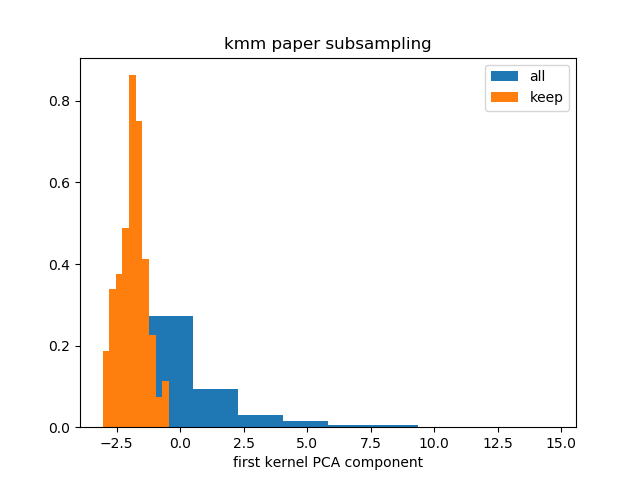

{'logverbosity': 2, 'maxiter': 1000}
Optimizing...
 iter		   cost val	    grad. norm
    0	+6.2422558969159610e+01	1.91096633e+00
    1	+6.2422612123108713e+01	1.91096776e+00
Terminated - min stepsize reached after 2 iterations, 0.87 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+6.2555915060571948e+01	2.05910167e+00
    1	+6.2555948896542411e+01	2.05909985e+00
Terminated - min stepsize reached after 2 iterations, 0.83 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+6.2648776930891358e+01	1.91876764e+00
    1	+6.2648778627870165e+01	1.91876768e+00
Terminated - min stepsize reached after 2 iterations, 0.81 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+6.2931685391906242e+01	2.71386991e+00
    1	+6.2931683863614332e+01	2.71387180e+00
Terminated - min stepsize reached after 2 iterations, 0.86 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+6.2341365038366270e+01	4.92934713e+00
    1	+6.2341355185584497e+01	4.92933896e+

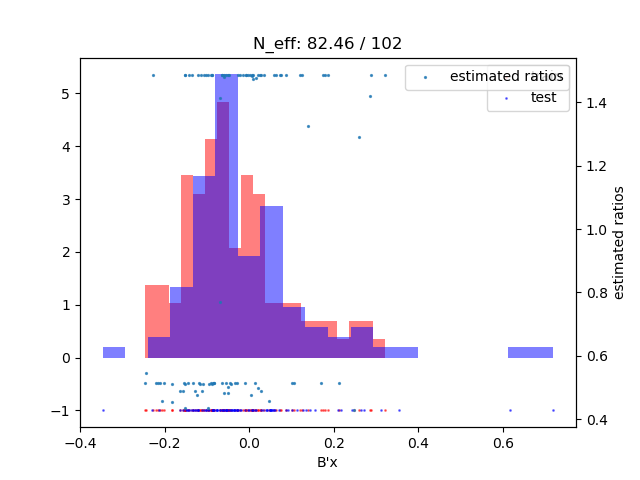

('fig_text #3',)
('train_loss: 0.51',)
('test_loss: 1.39',)


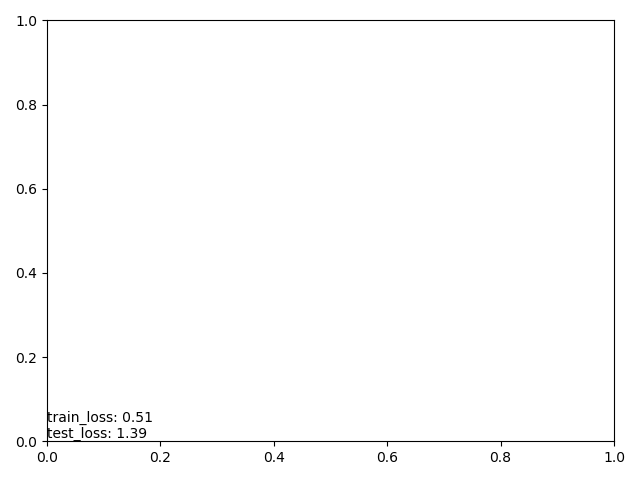

b_norm: 1.0


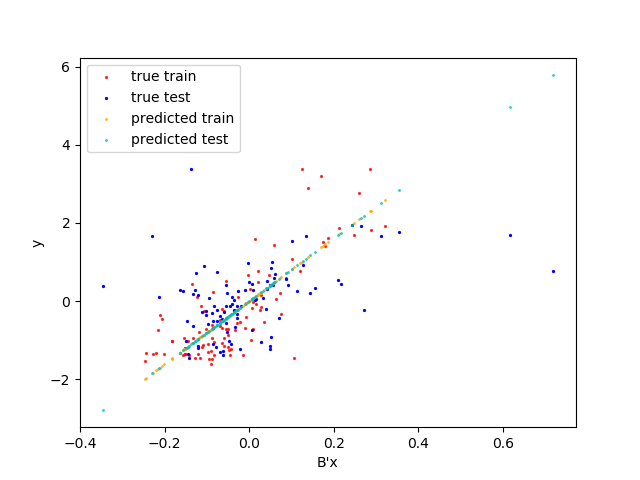

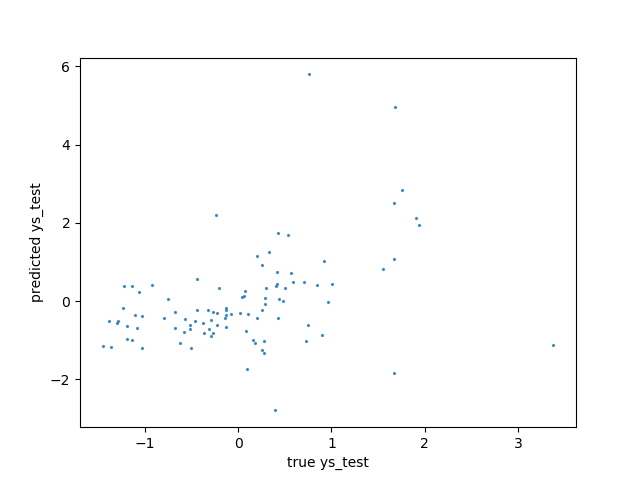

('fig_text #6',)
('single iteration',)
('inner iteration: 0',)
((('u_dim', 9), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)),)
('iteration: 0',)
('test_loss: 1.39',)
('train_loss: 0.51',)


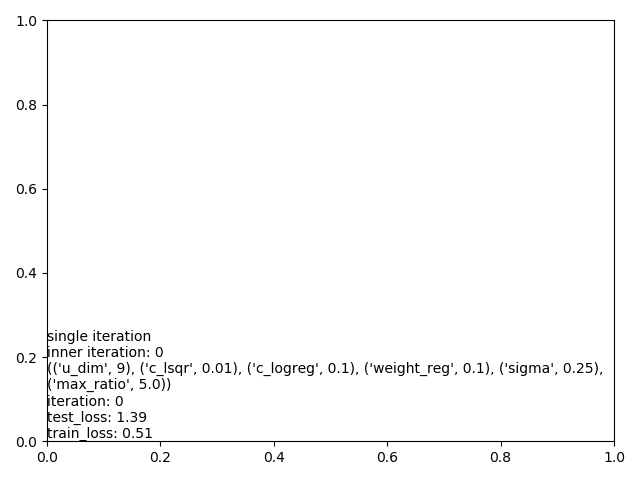

('fig_text #7',)
('single hyperparam',)
((('u_dim', 9), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)),)
('test mean loss: 1.39',)
('test std loss: 0.00',)
('test losses: [1.3908763590438318]',)
('train mean loss: 0.51',)
('train std loss: 0.00',)
('train losses: [0.51030195285874247]',)


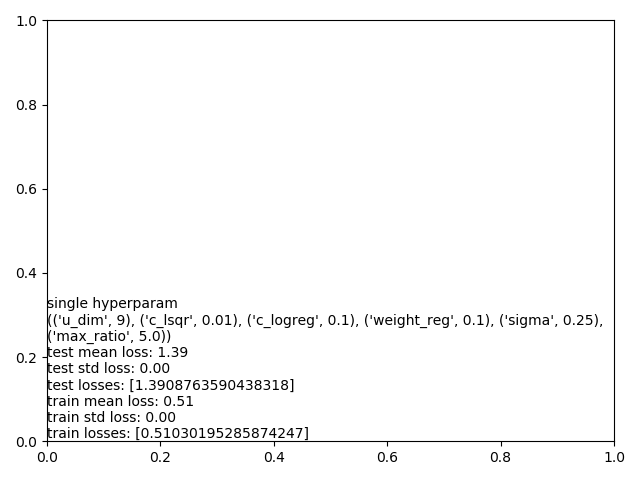

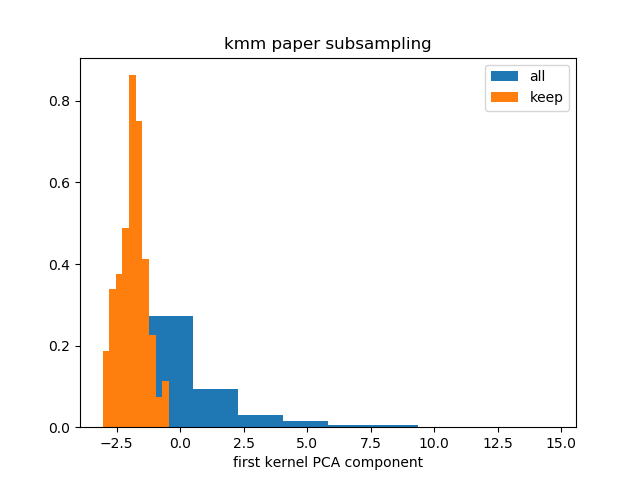

{'logverbosity': 2, 'maxiter': 1000}
Optimizing...
 iter		   cost val	    grad. norm
    0	+6.8122583842936450e+01	5.17061147e+01
    1	+6.6382228039278246e+01	5.37905472e-14
Terminated - min grad norm reached after 2 iterations, 1.70 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+5.9386303170162591e+01	5.07931574e+01
    1	+5.9386305750794492e+01	5.07931600e+01
Terminated - min stepsize reached after 2 iterations, 2.02 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+6.1071750103576591e+01	5.27643527e+01
    1	+6.1071471063208108e+01	5.27642265e+01
Terminated - min stepsize reached after 2 iterations, 1.93 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+7.1277594910451683e+01	1.13987371e+02
    1	+6.6380423105352435e+01	6.89192013e-14
Terminated - min grad norm reached after 2 iterations, 1.68 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+7.1578928063230222e+01	2.02318682e+01
    1	+6.6382242101517207e+01	5.72614591

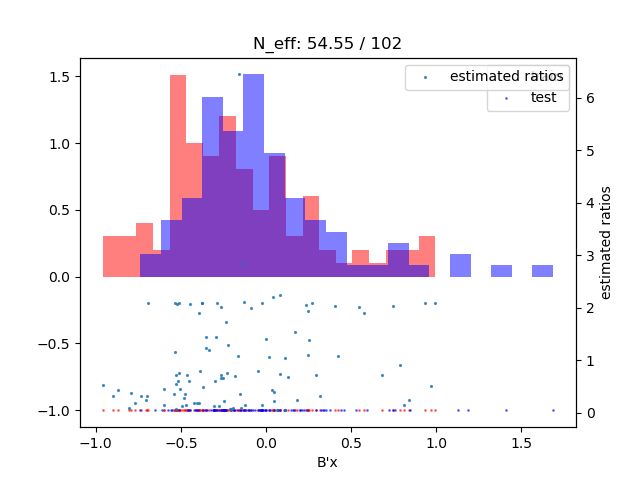

('fig_text #10',)
('train_loss: 0.51',)
('test_loss: 0.84',)


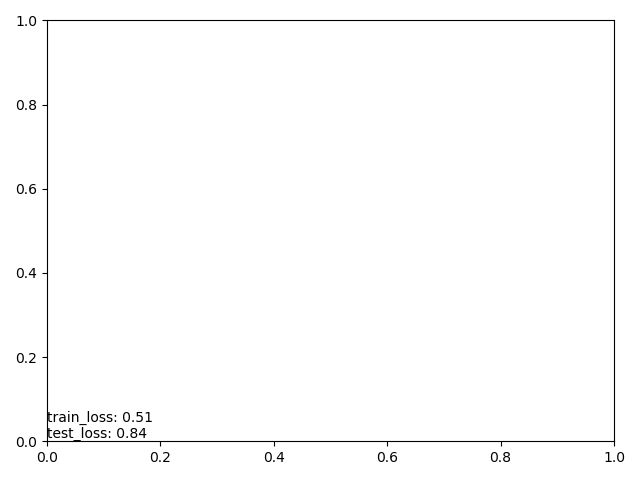

b_norm: 1.0


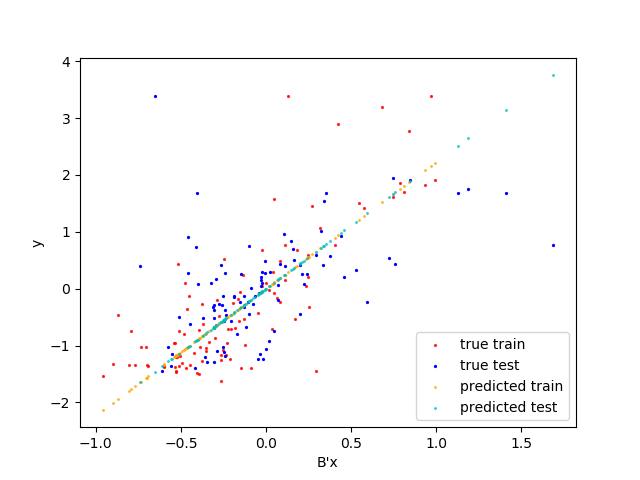

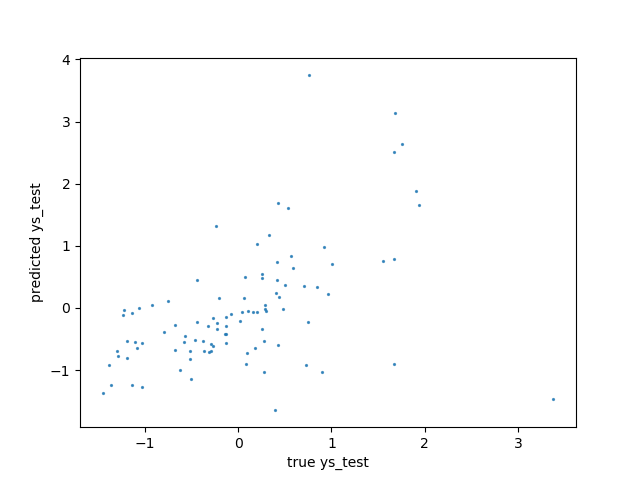

('fig_text #13',)
('single iteration',)
('inner iteration: 1',)
((('u_dim', 9), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 1.0), ('max_ratio', 5.0)),)
('iteration: 0',)
('test_loss: 0.84',)
('train_loss: 0.51',)


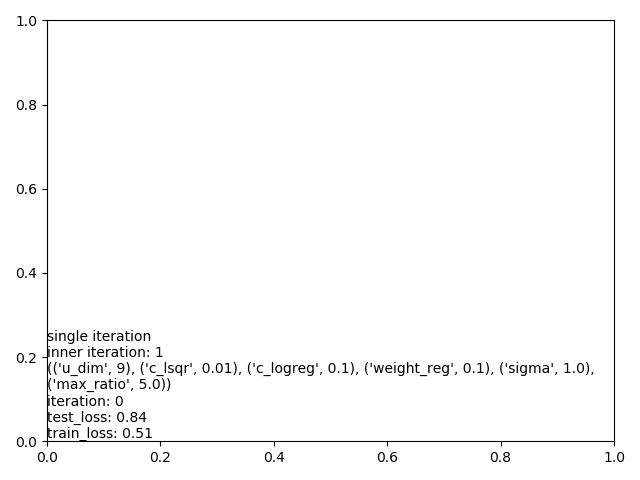

('fig_text #14',)
('single hyperparam',)
((('u_dim', 9), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 1.0), ('max_ratio', 5.0)),)
('test mean loss: 0.84',)
('test std loss: 0.00',)
('test losses: [0.84200823750778353]',)
('train mean loss: 0.51',)
('train std loss: 0.00',)
('train losses: [0.50526745630418346]',)


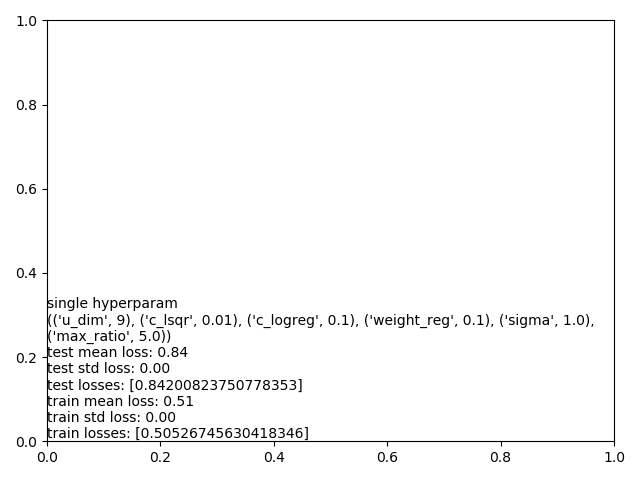

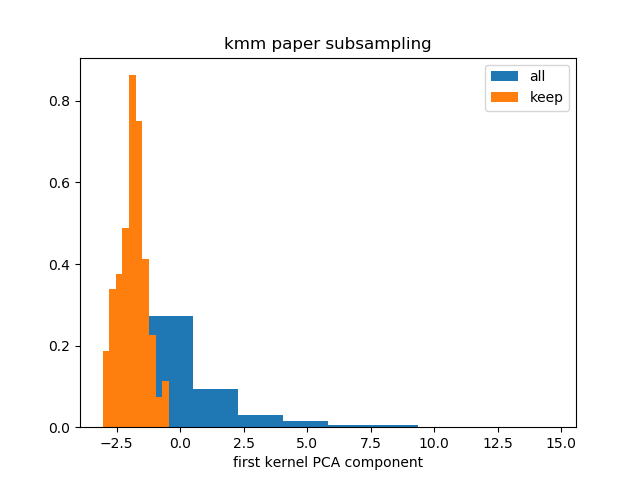

{'logverbosity': 2, 'maxiter': 1000}
Optimizing...
 iter		   cost val	    grad. norm
    0	+6.5345229457669390e+01	5.63938773e+01
    1	+6.5342046588622281e+01	5.63416015e+01
Terminated - min stepsize reached after 2 iterations, 3.56 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+6.6150535001632718e+01	5.38470450e+01
    1	+6.6147304924154355e+01	5.38366034e+01
Terminated - min stepsize reached after 2 iterations, 3.44 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+6.5886745481848010e+01	6.12333583e+01
    1	+6.5883491165023401e+01	6.12159668e+01
Terminated - min stepsize reached after 2 iterations, 3.17 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+6.4643568095238891e+01	5.90142084e+01
    1	+6.4642617656089115e+01	5.90100748e+01
Terminated - min stepsize reached after 2 iterations, 2.95 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+6.4631208404528294e+01	5.08526771e+01
    1	+6.4629230765525222e+01	5.08031157e+

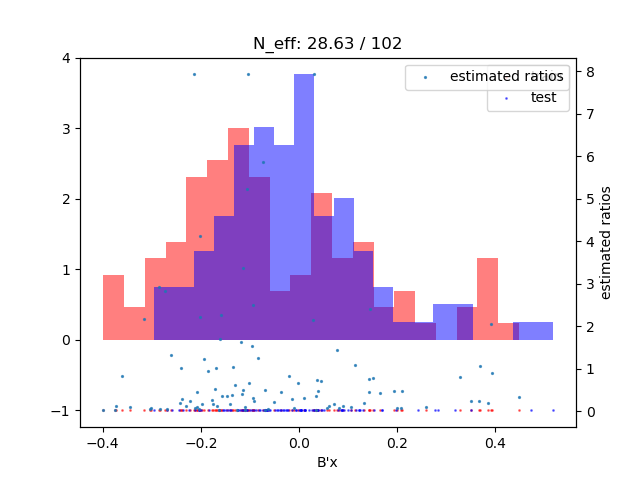

('fig_text #17',)
('train_loss: 0.58',)
('test_loss: 0.60',)


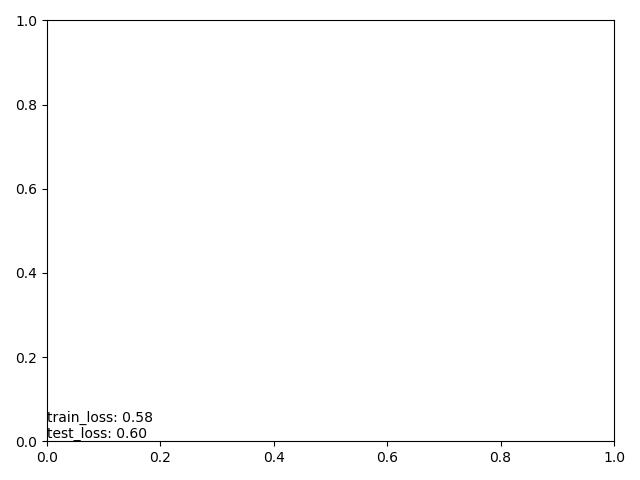

b_norm: 1.0


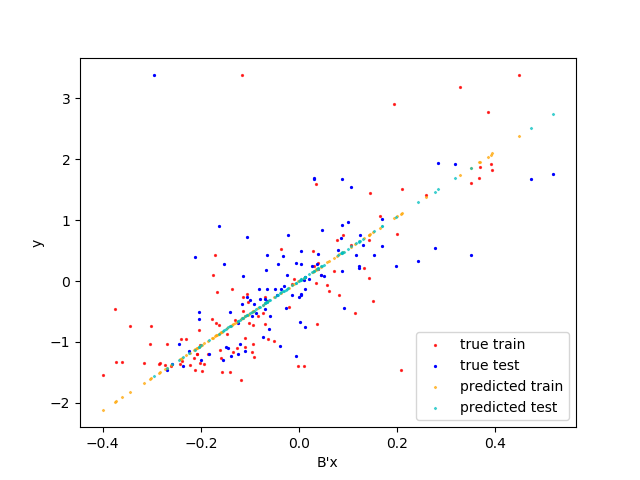

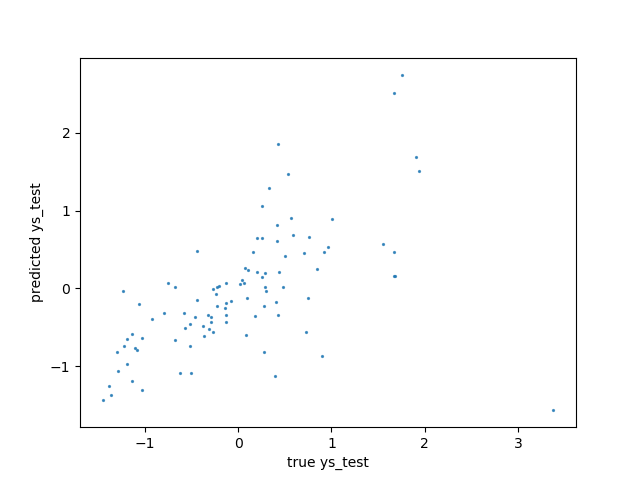

('fig_text #20',)
('single iteration',)
('inner iteration: 2',)
((('u_dim', 9), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 5.0), ('max_ratio', 5.0)),)
('iteration: 0',)
('test_loss: 0.60',)
('train_loss: 0.58',)


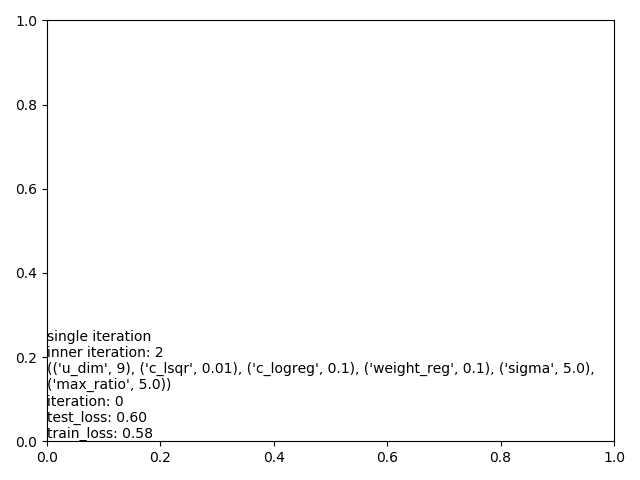

('fig_text #21',)
('single hyperparam',)
((('u_dim', 9), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 5.0), ('max_ratio', 5.0)),)
('test mean loss: 0.60',)
('test std loss: 0.00',)
('test losses: [0.59897671215024595]',)
('train mean loss: 0.58',)
('train std loss: 0.00',)
('train losses: [0.57743197341594499]',)


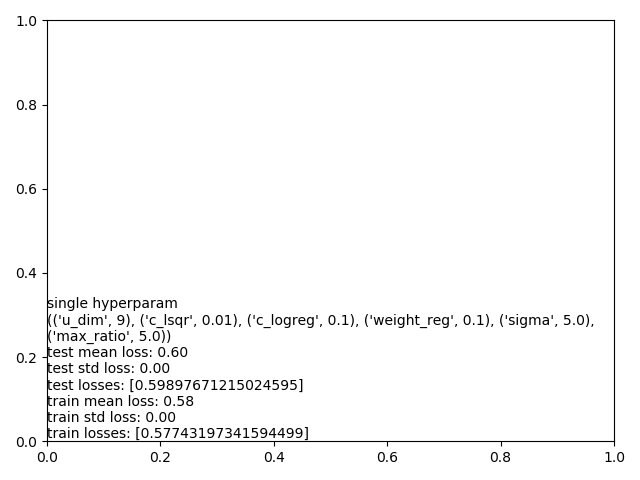

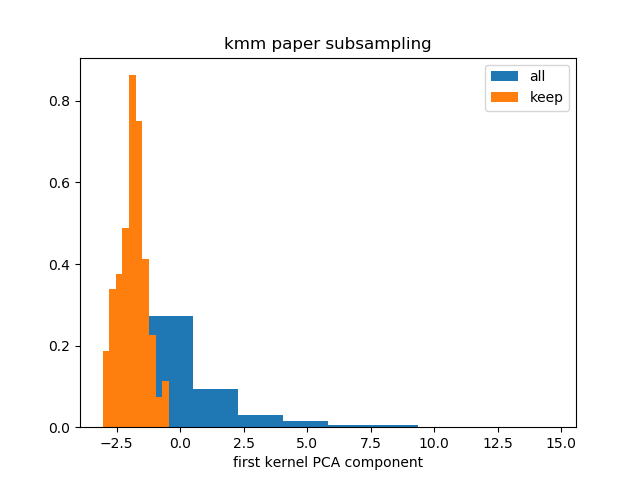

{'logverbosity': 2, 'maxiter': 1000}
Optimizing...
 iter		   cost val	    grad. norm
    0	+1.1260868453785361e+02	3.39119507e+00
    1	+1.1260877748561792e+02	3.39119465e+00
Terminated - min stepsize reached after 2 iterations, 0.84 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+1.1285719980210514e+02	3.49020064e+00
    1	+1.1285722907063470e+02	3.49020134e+00
Terminated - min stepsize reached after 2 iterations, 0.80 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+1.1303388443778165e+02	3.86336460e+00
    1	+1.1303388990882864e+02	3.86336355e+00
Terminated - min stepsize reached after 2 iterations, 0.79 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+1.1352750849856506e+02	5.16000542e+00
    1	+1.1352748889348976e+02	5.16001197e+00
Terminated - min stepsize reached after 2 iterations, 0.88 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+1.1281040628164465e+02	6.13542272e+00
    1	+1.1281038936087526e+02	6.13541858e+

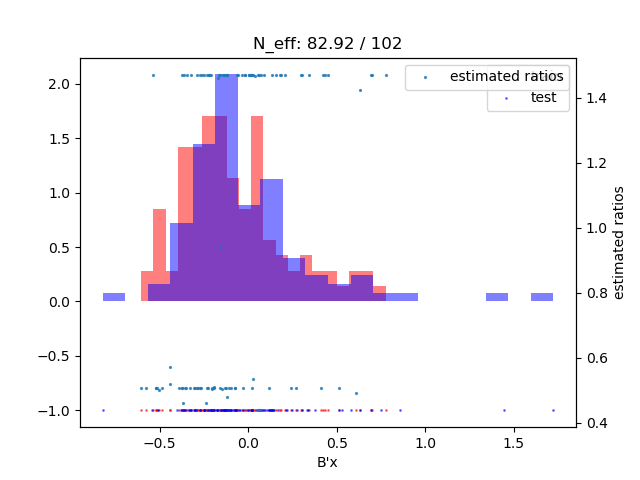

('fig_text #24',)
('train_loss: 0.51',)
('test_loss: 1.39',)


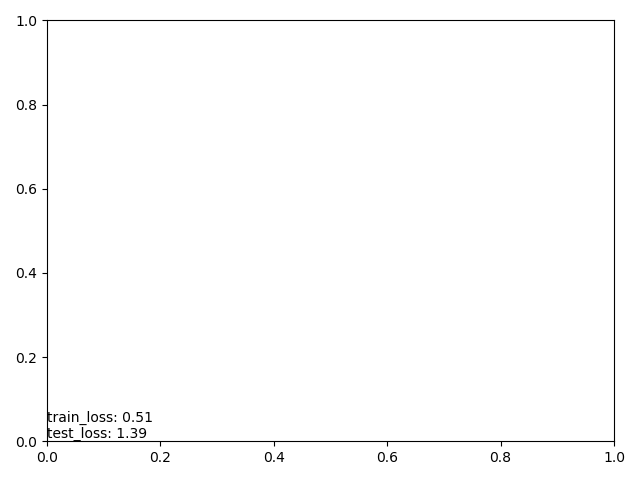

b_norm: 1.0


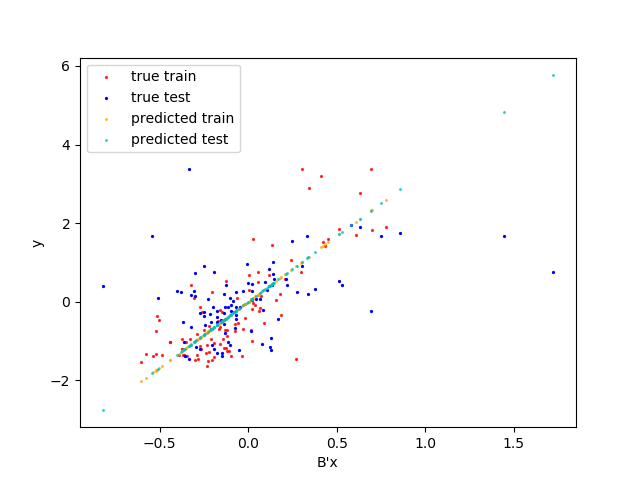

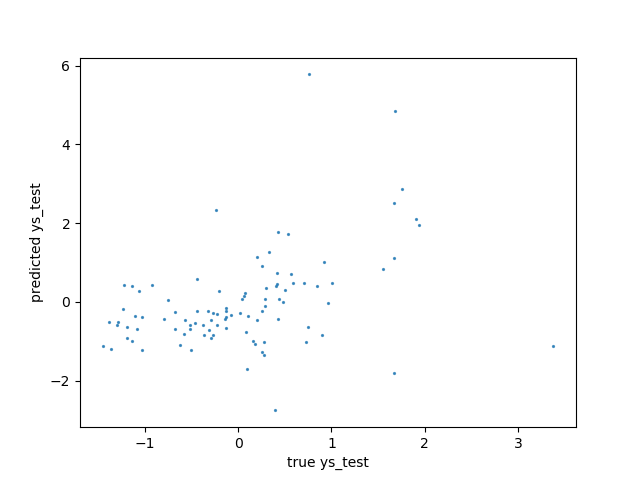

('fig_text #27',)
('single iteration',)
('inner iteration: 3',)
((('u_dim', 9), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.5), ('sigma', 0.25), ('max_ratio', 5.0)),)
('iteration: 0',)
('test_loss: 1.39',)
('train_loss: 0.51',)


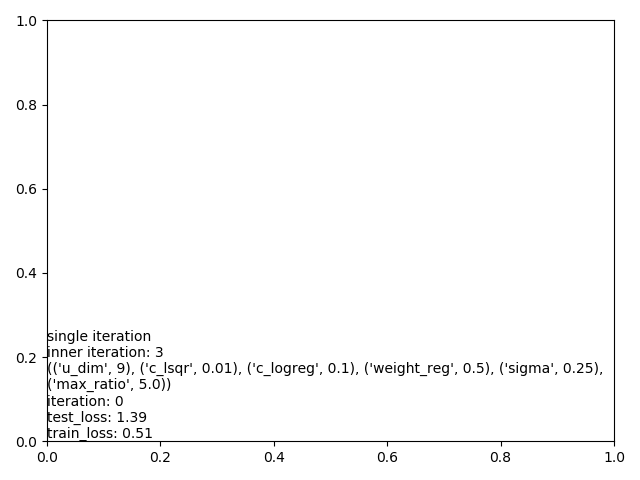

('fig_text #28',)
('single hyperparam',)
((('u_dim', 9), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.5), ('sigma', 0.25), ('max_ratio', 5.0)),)
('test mean loss: 1.39',)
('test std loss: 0.00',)
('test losses: [1.387367834050512]',)
('train mean loss: 0.51',)
('train std loss: 0.00',)
('train losses: [0.51388055382893461]',)


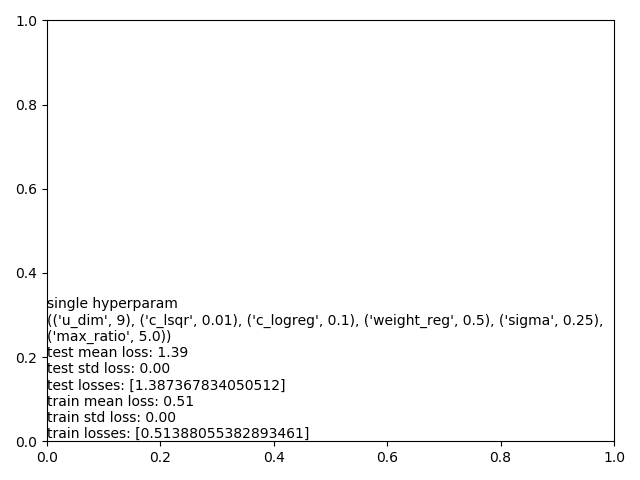

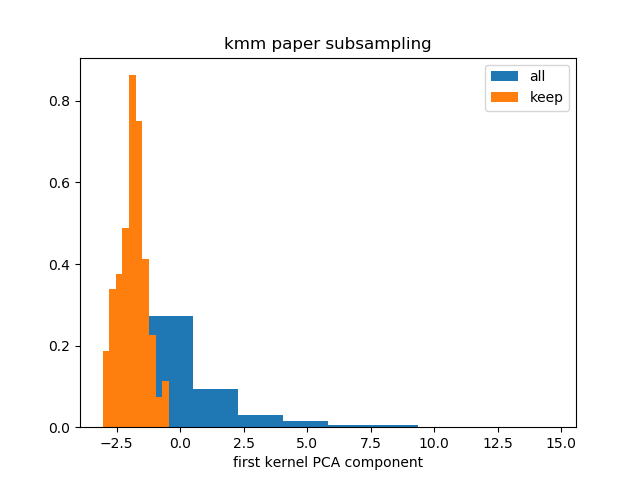

{'logverbosity': 2, 'maxiter': 1000}
Optimizing...
 iter		   cost val	    grad. norm
    0	+1.4302246306200882e+02	2.36494649e+02
    1	+1.4302590091615880e+02	2.36460485e+02
Terminated - min stepsize reached after 2 iterations, 1.92 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+1.3567656601960834e+02	1.71408455e+02
    1	+1.3568197430482076e+02	1.71385319e+02
Terminated - min stepsize reached after 2 iterations, 1.91 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+1.2512926483214599e+02	7.79373215e+01
    1	+1.2512855673722385e+02	7.79374439e+01
Terminated - min stepsize reached after 2 iterations, 1.94 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+1.6649897588062541e+02	7.11033674e+02
    1	+1.6649877640237307e+02	7.11141735e+02
Terminated - min stepsize reached after 2 iterations, 2.01 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+1.8289482893099017e+02	7.47861533e+01
    1	+1.8289641443240424e+02	7.47935760e+

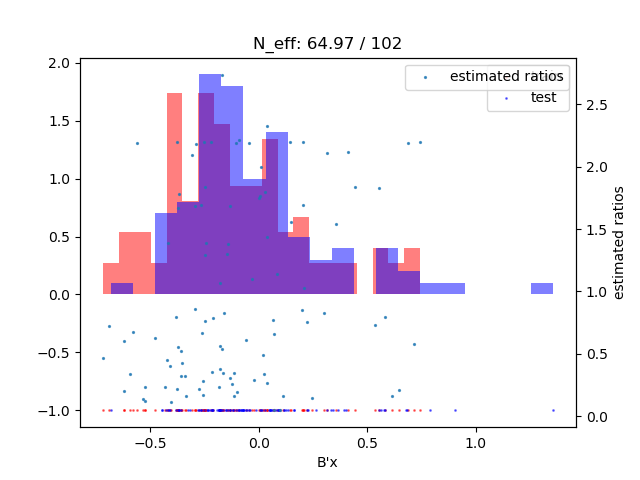

('fig_text #31',)
('train_loss: 0.50',)
('test_loss: 0.98',)


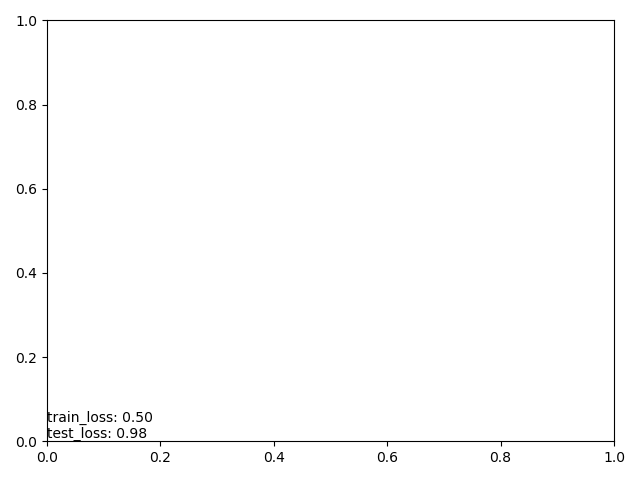

b_norm: 1.0


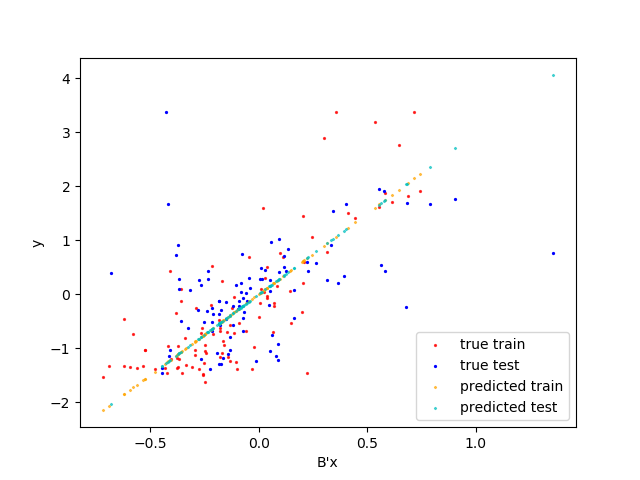

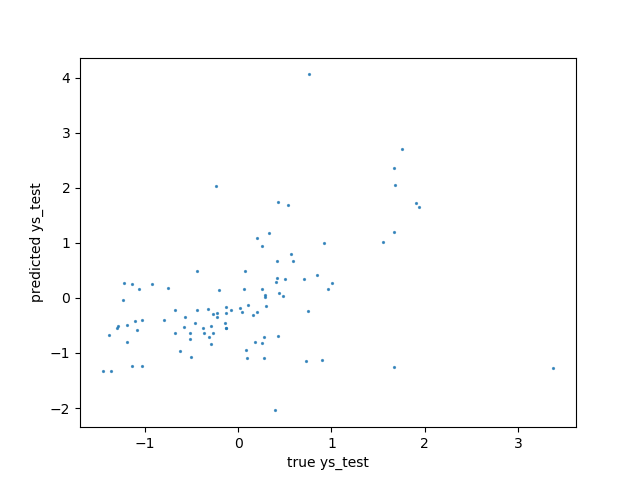

('fig_text #34',)
('single iteration',)
('inner iteration: 4',)
((('u_dim', 9), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.5), ('sigma', 1.0), ('max_ratio', 5.0)),)
('iteration: 0',)
('test_loss: 0.98',)
('train_loss: 0.50',)


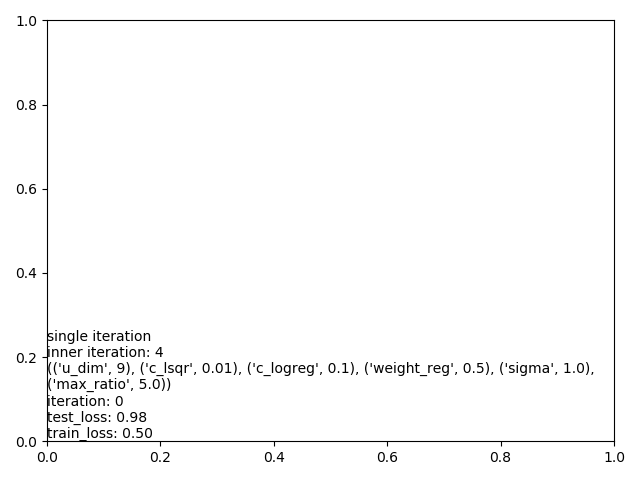

('fig_text #35',)
('single hyperparam',)
((('u_dim', 9), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.5), ('sigma', 1.0), ('max_ratio', 5.0)),)
('test mean loss: 0.98',)
('test std loss: 0.00',)
('test losses: [0.9768128059704414]',)
('train mean loss: 0.50',)
('train std loss: 0.00',)
('train losses: [0.50196142608896122]',)


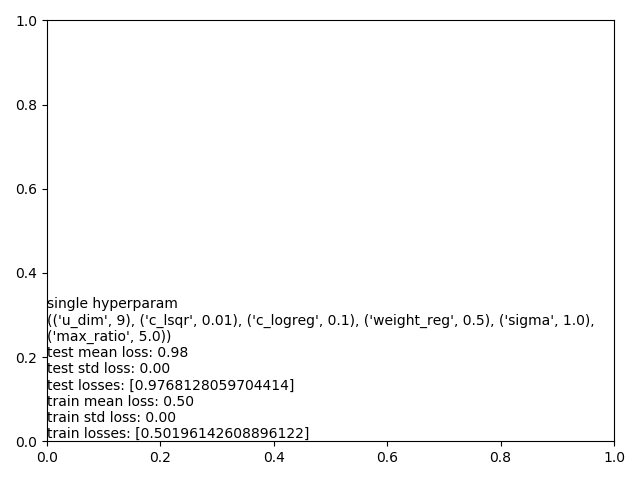

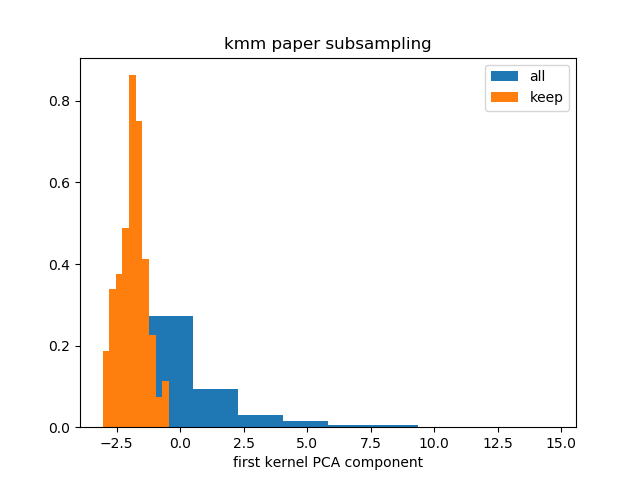

{'logverbosity': 2, 'maxiter': 1000}
Optimizing...
 iter		   cost val	    grad. norm
    0	+2.2261847265218765e+02	2.14440010e+02
    1	+1.9710071113307882e+02	1.92364231e-13
Terminated - min grad norm reached after 2 iterations, 2.26 seconds.

Optimizing...
 iter		   cost val	    grad. norm
    0	+2.1869510127616689e+02	1.61990263e+02
    1	+1.9711970047096102e+02	1.68432530e-13

In [ ]:
# 
run.run(get_data, get_fitter, care_hyperparam_tuples, nocare_hyperparam_tuples, num_iterations, mapper)